# Simulation for Library Acquisitions - printed books version.

In [1]:
import random
import numpy as np
import pandas as pd
import math

In [2]:
# This function get hourly labor costs from annual wages. 
# Hourly labor cost is calculated by using annual wages, befefit rate, and paid vacation hours. 
# (ALCTS Technical Services Costs Committee. "Guide to Cost Analysis of Acquisitions and Cataloging in Libraries," ALCTS Newsletter 2. no. 5, 1991: 49-52.)

def labor_costs(annual_work_hour):
    annual_wages = random.randint(50000, 70000)
    benefit_rate = random.uniform(0, 0.3)
    paid_off_hour = random.randint(0, 42)
    average_cost = (annual_wages + (annual_wages * benefit_rate)) / (annual_work_hour - paid_off_hour)
    return round(average_cost, 2)
labor_costs(1950)

26.9

In [3]:
# This function is to get annual maintenance cost from total volumes library houses and hourly labor costs.
# (Elise Calvi, Yvonne Carignan, Liz Dube, and Whitney Pape, The Preservation Manager's Guide to Cost Analysis, Chicago: American Library Association, 2006, 36-37.)
def maintenance_cost(annual_work_hour, total_volume):
    maintenance_labor = labor_costs(annual_work_hour) * 0.04
    volumes_per_box = math.ceil(total_volume / 25)
    maintenance_cost = volumes_per_box * maintenance_labor
    return round(maintenance_cost, 2)
maintenance_cost(1950, 350000)

18524.8

In [4]:
# This function calculates cataloging cost per a book. 
# The function randomly choose a catalog's productivity per day. 
# (Robert H. Burger, Financial Management of Libraries and Information Centers, California and Colorado: Libraries Unlimited, 2017, 249-253.)
def cataloging_cost(annual_work_hour):
    day_cataloging = random.randint(8, 12)
    daily_labor = labor_costs(annual_work_hour) * 8
    cost_per_book = daily_labor / day_cataloging
    return round(cost_per_book, 2)
cataloging_cost(1950)

31.74

In [5]:
# This function generates a list of books that are randomly selected in pages, page thickness, price, and demand level.
def get_book_list(num_of_titles, annual_work_hour):
    cost_per_book = cataloging_cost(annual_work_hour)
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_thickness = np.random.uniform(0.01, 0.05, size=num_of_titles)
    thickness = np.around(page_thickness * pages, decimals=2)
    page_price = np.random.uniform(0.01, 0.1, size=num_of_titles)
    price = np.around(page_price * pages, decimals=2)
    # Three types of demand indicates 3 is high, 2 medium, and 1 low.
    demand_list = ['1', '2', '3']
    demands = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        demands.append(demand)

    df = pd.DataFrame(data={'Thickness': thickness,
                            'Price': price,
                            'Demands': demands,
                            'cataloging_cost': cost_per_book})
    return df
plan = get_book_list(10000, 1950)
plan

,Thickness,Price,Demands,cataloging_cost
0,5.63,6.12,3,28.99
1,17.41,104.47,2,28.99
2,3.82,18.60,2,28.99
3,83.01,98.67,3,28.99
4,34.36,89.94,3,28.99
5,15.60,34.71,2,28.99
6,14.43,70.42,3,28.99
7,30.08,71.60,1,28.99
8,11.42,22.95,1,28.99
9,0.47,0.43,2,28.99


In [6]:
# This function calculates the percentage of discount that a vendor will offer based on how many books you purchase.
def vendor_discount(num_of_titles):
    if num_of_titles < 100:
        return 0.01
    elif 100 <= num_of_titles < 500:
        return 0.02
    elif num_of_titles >= 500:
        return 0.05

In [7]:
# Now we select from the list we created above.
# We consider both budget and thickness.
# We aggregate price and thickness separately, and we drop all nan value. 
# This is examples how it works.
plan = get_book_list(50, 1950)
budget = 1000
space = 500
select_plan = plan.copy(deep=True)
select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
print('This is total cost per book include book price itself and cataloging cost.\n\n', select_plan, '\n')
select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
print('Check price. \n\n', select_plan)
select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
print('Check thickness\n\n', select_plan)
acquisitions = select_plan.dropna()
acquisitions

This is total cost per book include book price itself and cataloging cost.

     Thickness   Price Demands  cataloging_cost  total_cost_per_book
0        3.94    4.10       1            34.42                38.52
1       65.08   77.16       3            34.42               111.58
2       16.36   21.24       1            34.42                55.66
3        3.59   16.96       1            34.42                51.38
4       23.40   33.30       1            34.42                67.72
5       14.08   25.99       3            34.42                60.41
6       34.46   25.72       2            34.42                60.14
7       52.62  107.28       3            34.42               141.70
8        4.78   14.45       1            34.42                48.87
9       86.10  180.34       2            34.42               214.76
10      25.96   49.98       1            34.42                84.40
11       2.33    4.63       1            34.42                39.05
12      28.58   99.30       2          

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,3.94,4.10,1,34.42,38.52,38.52,3.94
1,65.08,77.16,3,34.42,111.58,150.10,69.02
2,16.36,21.24,1,34.42,55.66,205.76,85.38
3,3.59,16.96,1,34.42,51.38,257.14,88.97
4,23.40,33.30,1,34.42,67.72,324.86,112.37
5,14.08,25.99,3,34.42,60.41,385.27,126.45
6,34.46,25.72,2,34.42,60.14,445.41,160.91
7,52.62,107.28,3,34.42,141.70,587.11,213.53
8,4.78,14.45,1,34.42,48.87,635.98,218.31
9,86.10,180.34,2,34.42,214.76,850.74,304.41


In [8]:
# From the above test, the code is re-written as a function. 
# return a dataFrame which is satisfied with both conditions (budget and thickness)

def select_book(plan, budget, space):
    select_plan = plan.copy(deep=True)
    select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
    select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
    acquisitions = select_plan.dropna()
    return acquisitions

select_book(plan, 1000000, 1000)

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,3.94,4.10,1,34.42,38.52,38.52,3.94
1,65.08,77.16,3,34.42,111.58,150.10,69.02
2,16.36,21.24,1,34.42,55.66,205.76,85.38
3,3.59,16.96,1,34.42,51.38,257.14,88.97
4,23.40,33.30,1,34.42,67.72,324.86,112.37
5,14.08,25.99,3,34.42,60.41,385.27,126.45
6,34.46,25.72,2,34.42,60.14,445.41,160.91
7,52.62,107.28,3,34.42,141.70,587.11,213.53
8,4.78,14.45,1,34.42,48.87,635.98,218.31
9,86.10,180.34,2,34.42,214.76,850.74,304.41


In [9]:
# This function an MC simulation for acquisitions.
# Here are two strategies to purchase books: users' demands and price.
# In the first strategy, the simulation selects books from high demands to low.
# In the second strategy, the simulation selects books from cheapest books to most expensive books.
# The twoo stragegies select books under the budget and space.
def MonteCarloSimulation(annual_work_hour, total_volume, budget, space, num_of_titles) -> list:
    acquisition_budget = budget - maintenance_cost(annual_work_hour, total_volume)


    plan = get_book_list(num_of_titles, annual_work_hour)


    demand_order = plan.sort_values(by='Demands', ascending=False)
    price_order = plan.sort_values(by='Price', ascending=True)

    demand_acquisition = select_book(demand_order, acquisition_budget, space)
    price_acquisition = select_book(price_order, acquisition_budget, space)

    demand_book = demand_acquisition['Price'].count()
    demand_cost = round(demand_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(demand_book)), 2)
    demand_thickness = math.ceil(demand_acquisition['Thickness'].sum())

    price_book = price_acquisition['Price'].count()
    price_cost = round(price_acquisition['total_cost_per_book'].sum() * 1 - vendor_discount(price_book), 2)
    price_thickness = math.ceil(price_acquisition['Thickness'].sum())

    sim_data = [demand_book, demand_cost, demand_thickness, price_book, price_cost, price_thickness]

    return sim_data
MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)

[327, 25391.45, 9999, 4264, 106681.43, 9992]

In [10]:
# Simulation for 100 times and return Data Frame.
if __name__ == '__main__':


    datas = []
    for i in range(100):
        data = MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)
        datas.append(data)
    simulation_result = pd.DataFrame(datas, columns=['num_of_books_by_demand',
                                                     'total_cost_by_demand',
                                                     'total_thickness_by_demand',
                                                     'num_of_books_by_price',
                                                     'total_cost_by_price',
                                                     'total_thickness_by_price'])
simulation_result

,num_of_books_by_demand,total_cost_by_demand,total_thickness_by_demand,num_of_books_by_price,total_cost_by_price,total_thickness_by_price
0,333,30744.34,9966,4250,175980.76,10000
1,335,23992.75,9995,4181,92928.65,9999
2,339,27385.75,9954,4168,113087.96,9996
3,352,33098.91,9983,4166,176805.48,10000
4,332,24675.75,9949,4269,113286.10,10000
5,348,27881.71,9975,4219,135262.22,9997
6,316,29042.39,9949,4294,162544.09,10000
7,326,29298.42,9969,4230,151144.68,9995
8,311,27862.55,9919,4175,155072.82,10000
9,354,26168.35,10000,4274,108135.98,9997


In [11]:
import matplotlib.pyplot as plt


a = simulation_result['total_cost_by_demand']
b = simulation_result['num_of_books_by_demand']
c = simulation_result['total_cost_by_price']
d = simulation_result['num_of_books_by_price']
e = simulation_result['total_thickness_by_demand']
f = simulation_result['total_thickness_by_price']

s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by User Demand")
plt.scatter(a, b, s, c="g", alpha=0.5, marker='.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()

<Figure size 640x480 with 1 Axes>

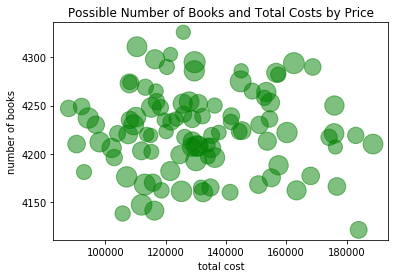

In [12]:
s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(c, d, s, c="g", alpha=0.5, marker='.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()


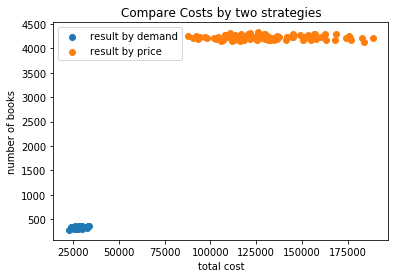

In [13]:
plt.title("Compare Costs by two strategies")
plt.scatter(a, b, label="result by demand")
plt.scatter(c, d, label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()

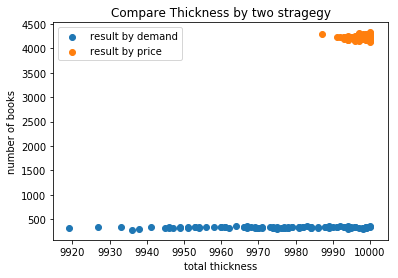

In [14]:
plt.title("Compare Thickness by two stragegy")
plt.scatter(e, b, label="result by demand")
plt.scatter(f, d, label="result by price")
plt.xlabel("total thickness")
plt.ylabel("number of books")

plt.legend()

plt.show()

## Conclusion
The simulation results differently what we expected. The number of books a library can purchase based on users' demands (high population) are less than the number of books purchased based on books' prices. 